<a href="https://colab.research.google.com/github/ankurrokad/Artificial-Neural-Network/blob/Ankur/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Problem

**Our goal is to predict , when customer service representative call the customer, will they subscribe for a bank term deposit or not?**

**Dataset : https://archive.ics.uci.edu/ml/datasets/Bank+Marketing**

### Team

* [Ankur Rokad](https://github.com/ankurrokad)
* [Sahista Patel](https://github.com/Sahista-Patel)
* [Murali Krishna](https://github.com/muralikrishnarar)
* [Gursanjam Kaur](https://github.com/sv2021)




In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sos
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from time import time

In [12]:
#ANN Model
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv('https://raw.githubusercontent.com/ankurrokad/Artificial-Neural-Network/main/bank-additional-full.csv', sep=';')
df.columns = ['age', 'job', 'marital', 'education', 'credit', 'housing', 'loan','contact', 'month', 'day_of_week',
              'duration', 'campaign', 'pdays','previous', 'poutcome', 'emp.var.rate', 'cons.price.idx','cons.conf.idx',
              'euribor3m', 'nr.employed', 'subscribed']
df.head()


,age,job,marital,education,credit,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Dataset Discription

### User Details:

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

### Related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

# Other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

# Social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric)

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

# Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [15]:
df['subscribed'].value_counts()/41188

no     0.887346
yes    0.112654
Name: subscribed, dtype: float64

In [16]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
credit            0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
subscribed        0
dtype: int64

We dont have any null values, so no need to do any imputation or anything

# Pre processing

## Feature Eng.

Corr                       age  duration  ...  euribor3m  nr.employed
age             1.000000 -0.000866  ...   0.010767    -0.017725
duration       -0.000866  1.000000  ...  -0.032897    -0.044703
campaign        0.004594 -0.071699  ...   0.135133     0.144095
pdays          -0.034369 -0.047577  ...   0.296899     0.372605
previous        0.024365  0.020640  ...  -0.454494    -0.501333
emp.var.rate   -0.000371 -0.027968  ...   0.972245     0.906970
cons.price.idx  0.000857  0.005312  ...   0.688230     0.522034
cons.conf.idx   0.129372 -0.008173  ...   0.277686     0.100513
euribor3m       0.010767 -0.032897  ...   1.000000     0.945154
nr.employed    -0.017725 -0.044703  ...   0.945154     1.000000

[10 rows x 10 columns]


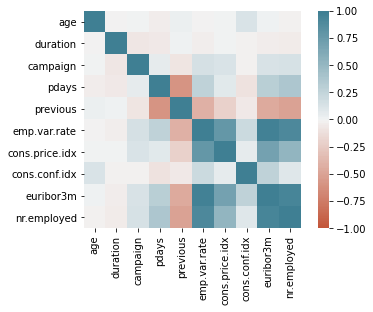

In [17]:
corr = df.corr()
print(f"Corr  {corr}")
sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

## Label Encoding

In [18]:
df.drop(['age', 'job','marital','education','housing', 'loan', 'day_of_week' ], axis=1, inplace=True)

In [19]:
df.select_dtypes('object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   credit      41188 non-null  object
 1   contact     41188 non-null  object
 2   month       41188 non-null  object
 3   poutcome    41188 non-null  object
 4   subscribed  41188 non-null  object
dtypes: object(5)
memory usage: 1.6+ MB


In [20]:
dict_poutcome = {
    "poutcome":{
        "nonexistent":0,
        "failure":0,
        "success":1
    }}
dict_y = {
    "subscribed":{
        "no":0,
        "yes":1
    }}

In [21]:
for i in [dict_poutcome,dict_y]:
    df.replace(i,inplace=True)

In [22]:
df.head()

,credit,contact,month,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,no,telephone,may,261,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
1,unknown,telephone,may,149,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
2,no,telephone,may,226,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
3,no,telephone,may,151,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
4,no,telephone,may,307,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0


In [23]:
#Encoding rest of the un ordinal categorical variable 
lc_X1 = LabelEncoder()
lst = ['credit','contact','month']
for i in lst:
    df[i] = lc_X1.fit_transform(df[i])

In [24]:
df.head()
# df.groupby(df['marital']).mean()

,credit,contact,month,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,0,1,6,261,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
1,1,1,6,149,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
2,0,1,6,226,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
3,0,1,6,151,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
4,0,1,6,307,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0


In [25]:
#one hot encoding
df_1 = pd.get_dummies(df,
                      columns=['credit','contact','month'],
                      drop_first=True)

In [26]:
print(df_1.shape)
df_1.head()

(41188, 23)


,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed,credit_1,credit_2,contact_1,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9
0,261,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1,0,0,0,0,0,1,0,0,0
1,149,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,1,0,0,0,0,0,1,0,0,0
2,226,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1,0,0,0,0,0,1,0,0,0
3,151,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1,0,0,0,0,0,1,0,0,0
4,307,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1,0,0,0,0,0,1,0,0,0


## Splitting the data and Scaling

In [27]:
#Assign Variable
X = df_1.drop(columns = 'subscribed',axis=1).values
y = df_1['subscribed'].values 
#split training - test set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=101)

In [28]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# Printing Results

In [29]:
# We are using this function to calculate the accuracy, precision, recall, f1_score etc.
# Hyperparams: model = string, labels = y, pred = model.pred(y)
def print_scores(model, labels, pred):
    # Confusion matrix
    accuracy = round(accuracy_score(labels, pred), 3)
    precision = round(precision_score(labels, pred), 3)    
    recall = round(recall_score(labels, pred), 3)
    f1 = round(f1_score(labels, pred), 3)
    
    cm = confusion_matrix(labels, pred)
    df = pd.DataFrame(cm)
#     print(df)
    
    print(f"TP: {df[0][0]} ")
    print(f"TN: {df[1][1]} ")
    print(f"FP: {df[1][0]} ")
    print(f"FN: {df[0][1]} ")
    
    print(f"{model}:: Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, f1_score: {f1}")

In [30]:
# print the cross-validation results
def print_cv_result(results):
    print(f"Best Params : {results.best_params_}\n")
    
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print(f'{round(mean, 3)} (+/-{round(std * 2, 3)}) for {params}')

# SVM

In [31]:
# Standard

start = time()
svc = SVC(kernel = "rbf", C=10)
svc.fit(X_train,y_train)
y_pred_svm = svc.predict(X_test)
end = time()
print(f"SVM Time:{round((end - start), 5) * 1000}")
print_scores("SVM", y_test, y_pred_svm)

SVM Time:21650.66
TP: 7116 
TN: 358 
FP: 163 
FN: 601 
SVM:: Accuracy: 0.907, Precision: 0.687, Recall: 0.373, f1_score: 0.484


In [32]:
# K-Fold Cross Validation

# start = time()
# svc = SVC()
# parameters = {
#     'kernel' : ['linear', 'rbf'],
#     'C' : [1, 10]
# }

# cv = GridSearchCV(svc, parameters, cv=5)

# cv.fit(X_train, y_train)

# print_cv_result(cv)

# # best_params = cv.best_params_
# # print(best_params)
# # svc = SVC(kernel=best_params['kernel'], C=best_params['C'])


# y_pred_svm = cv.predict(X_test)
# print_scores("SVM", y_test, y_pred_svm)

# end = time()
# print(f"SVM Time:{round((end - start), 5) * 1000}")


# Logistic Regression

In [33]:
lgr = LogisticRegression()
lgr.fit(X_train, y_train)
y_pred_lgr = lgr.predict(X_test)
print_scores("LGR", y_test, y_pred_lgr)

TP: 7087 
TN: 372 
FP: 192 
FN: 587 
LGR:: Accuracy: 0.905, Precision: 0.66, Recall: 0.388, f1_score: 0.489


# ANN

In [34]:
classifier = Sequential()
print(df_1.shape)

(41188, 23)


##### Configuring the layers
* units — number of nodes for first layer
* activation — activation function we use hidden layers
* kernel_initializer — initiating weight as close as 0
* input_dim — number of independent variable in our dataset

<!-- ![img](https://miro.medium.com/max/4200/1*GTLzJ0sUmwDPb9uVffnZ6g.png) -->

In [35]:
classifier.add(Dense(units=13,
                     activation='relu',
                     kernel_initializer='uniform',
                     input_dim=22))
classifier.add(Dropout(rate=0.1))

In [36]:
classifier.add(Dense(units=13,
                     activation='relu',
                     kernel_initializer='uniform'))
classifier.add(Dropout(rate=0.1))

In [37]:
classifier.add(Dense(units=1,
                     activation='sigmoid',
                     kernel_initializer='uniform'))

In [38]:
#compile ANN
classifier.compile(optimizer='adam',loss='binary_crossentropy',
                  metrics=['accuracy'])

#####  Training and testing

* batch_size — number of sample it takes for each iteration
* epochs — number of iteration to optimise the model

In [ ]:
  #fitting ANN

  print(X_train.shape, y_train.shape)
  start = time()
  history = classifier.fit(x=X_train, y=y_train, batch_size=10,epochs=100)

(32950, 22) (32950,)
Epoch 1/100
3295/3295 [==============================] - 4s 1ms/step - loss: 0.2172 - accuracy: 0.9032
Epoch 2/100
3295/3295 [==============================] - 4s 1ms/step - loss: 0.1903 - accuracy: 0.9107
Epoch 3/100
3295/3295 [==============================] - 4s 1ms/step - loss: 0.1889 - accuracy: 0.9099
Epoch 4/100
3295/3295 [==============================] - 4s 1ms/step - loss: 0.1871 - accuracy: 0.9086
Epoch 5/100
3295/3295 [==============================] - 4s 1ms/step - loss: 0.1870 - accuracy: 0.9111
Epoch 6/100
3295/3295 [==============================] - 4s 1ms/step - loss: 0.1848 - accuracy: 0.9098
Epoch 7/100
3295/3295 [==============================] - 4s 1ms/step - loss: 0.1842 - accuracy: 0.9138
Epoch 8/100
3295/3295 [==============================] - 4s 1ms/step - loss: 0.1820 - accuracy: 0.9144
Epoch 9/100
3295/3295 [==============================] - 4s 1ms/step - loss: 0.1830 - accuracy: 0.9138
Epoch 10/100
3295/3295 [============================

In [ ]:
y_pred_ann = classifier.predict(X_test)
end = time()
print(f"ANN Time:{round((end - start), 5) * 1000}")
"""
y_pred array contains boolean value of whether dependent variable has more than 50% chance of being ‘yes’ or not.

If ‘yes’ it will be True, if ‘no’ it will be ‘False’.
"""
y_pred_ann_bool = y_pred_ann > 0.5

print_scores("ANN", y_test, y_pred_ann_bool)

# References

* Activation Function : https://www.analyticsvidhya.com/blog/2020/01/fundamentals-deep-learning-activation-functions-when-to-use-them/
* Keras : https://medium.com/datadriveninvestor/building-neural-network-using-keras-for-classification-3a3656c726c1
* Confusion Matrix : https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9